# Practice Assignment: Understanding Distributions Through Sampling

***This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!***


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

## <span style="color:red">Note to Reviewer: _Please Run All Cells_ in This Jupyter Notebook</span>

### Observe The Animation Demo at The End of The Notebook
 _Run all cells_ in this Jupyter Notebook. Upon doing so, please observe the animation demo at the end of the notebook.

### Scroll up And Check out Two Sliders And Reset Button
Upon completion of the animation (about 13 seconds), scroll back up to the figure entitled [Distributions with Sliders for Varying Number of Bins And Number of Samples](#The-Figure-is-a-GridSpec-with-4-rows-and-1-column). You can check out the two sliders and the reset button in that figure.

# Demo: Interactivity

In [1]:
%matplotlib notebook
from matplotlib.widgets import Slider, Button
import pylab as p
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

## The Figure is a GridSpec with 4 rows and 1 column

<IPython.core.display.Javascript object>


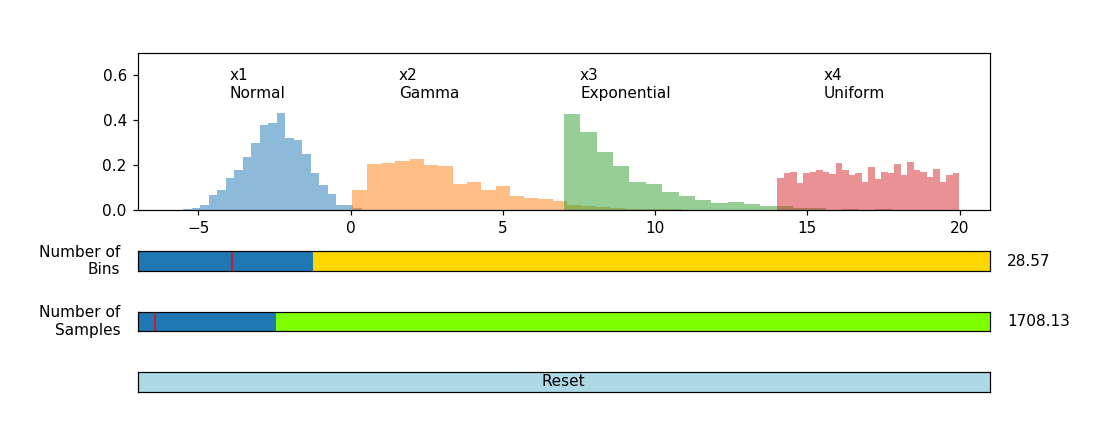

In [2]:
fig = plt.figure(
    'Distributions with Sliders for Varying Number of Bins And Number of Samples', figsize=(10, 4))
gs = gridspec.GridSpec(4, 1, height_ratios=[10, 1.25, 1.25, 1.25], hspace=.75)

### The first row contains the plots

In [3]:
dist = plt.subplot(gs[0])

#### First Plot: The Plot of a Normal Distribution

##### Initial Number of Bins and Initial Number of Samples

In [4]:
b_init = 20
n_init = 300

### Render The Plots

In [5]:
def render_plots(_b, _n):
    global dist

    x1 = np.random.normal(-2.5, 1, int(_n))
    x2 = np.random.gamma(2, 1.5, int(_n))
    x3 = np.random.exponential(2, int(_n))+7
    x4 = np.random.uniform(14, 20, int(_n))

    dist = plt.subplot(gs[0])

    dist.cla()
    dist.hist(x1, normed=True, bins=int(_b), alpha=0.5)
    dist.hist(x2, normed=True, bins=int(_b), alpha=0.5)
    dist.hist(x3, normed=True, bins=int(_b), alpha=0.5)
    dist.hist(x4, normed=True, bins=int(_b), alpha=0.5)

    dist.axis([-7, 21, 0, 0.7])

    dist.text(x1.mean() - 1.5, 0.5, 'x1\nNormal')
    dist.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
    dist.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
    dist.text(x4.mean()-1.5, 0.5, 'x4\nUniform')


render_plots(b_init, n_init)

c:\users\samuel\envs\coursera\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\users\samuel\envs\coursera\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


### The 2nd row contains the number of bins slider

In [6]:
bSlider = plt.subplot(gs[1], facecolor='gold')

b_min = 10
b_max = 100

#### Render the number of bins slider

In [7]:
b = Slider(bSlider, 'Number of\nBins', b_min, b_max, valinit=b_init)

### The 3rd row contains the number of samples slider

In [8]:
nSlider = plt.subplot(gs[2], facecolor='chartreuse')

In [9]:
n_min = 100
n_max = 10000

#### Render the number of samples slider

In [10]:
n = Slider(nSlider, 'Number of\nSamples', n_min, n_max, valinit=n_init)

### The 4th row contains the reset button

In [11]:
rButton = plt.subplot(gs[3])

#### Render the reset button

In [12]:
r = Button(rButton, 'Reset', color='lightblue')

## Number of Bins Update

In [13]:
def bUpdate(new_b):
    render_plots(int(new_b), int(n.val))


b.on_changed(bUpdate)

0

## Number of Samples Update

In [14]:
def nUpdate(new_n):
    render_plots(int(b.val), int(new_n))


n.on_changed(nUpdate)

0

## Reset Button Click

In [15]:
def reset(event):
    global bSlider, nSlider, rButton, b, n, r
    fig.clf()

    render_plots(b_init, n_init)

    bSlider = plt.subplot(gs[1], facecolor='gold')
    nSlider = plt.subplot(gs[2], facecolor='chartreuse')
    rButton = plt.subplot(gs[3], facecolor='red')

    b = Slider(bSlider, 'Number of\nBins', b_min, b_max, valinit=b_init)
    b.on_changed(bUpdate)

    n = Slider(nSlider, 'Number of\nSamples', n_min, n_max, valinit=n_init)
    n.on_changed(nUpdate)

    r = Button(rButton, 'Reset', color='lightblue')
    r.on_clicked(reset)

    fig.canvas.draw_idle()


r.on_clicked(reset)

0

# Demo: Animations

In [16]:
import matplotlib.animation as animation

iterations = 100
nsamples = np.random.randint(100, 1000)

In [17]:
def update(i):
    # check if animation is at the last frame, and if so, stop the animation a
    if i == iterations:
        a.event_source.stop()
    render_plots(b_init, nsamples)

<IPython.core.display.Javascript object>


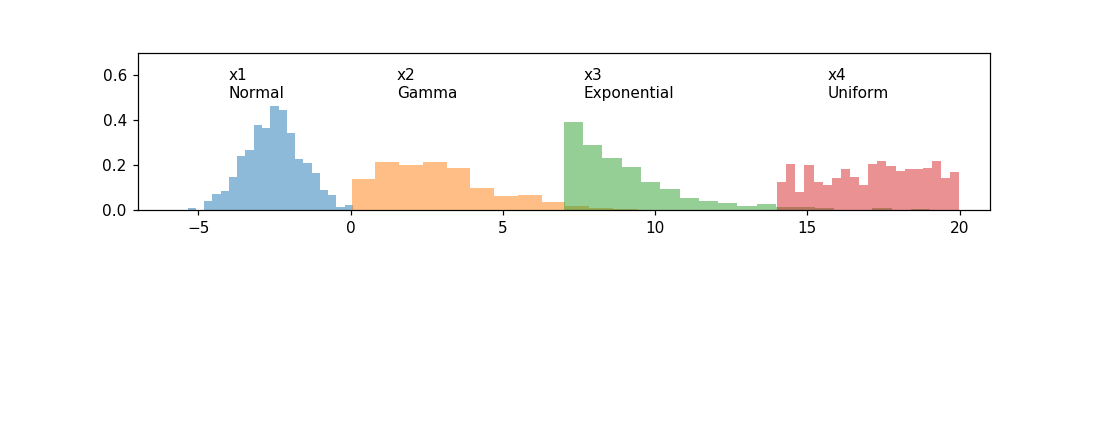

In [19]:
animated_fig = plt.figure(
    f'Animation with {b_init} bins and {nsamples:,} samples', figsize=(10, 4))
a = animation.FuncAnimation(animated_fig, update, interval=100)

<span style="color:red">_**Reviewer, Please Note**_</span>

Upon completion of the animation (about 13 seconds), scroll back up to the figure entitled [Distributions with Sliders for Varying Number of Bins And Number of Samples](#The-Figure-is-a-GridSpec-with-4-rows-and-1-column). You can check out the two sliders and the reset button in that figure.